<a href="https://colab.research.google.com/github/Eric428-a/-LMS-Learning-Management-System/blob/master/1_5_1_b_Moving_Average_Crossover_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Importing Libraries and Dataset

In [2]:
# Import necessary libraries

In [3]:
import pandas as pd  # Import Pandas for data manipulation

In [4]:
import numpy as np  # Import NumPy for numerical operations

In [5]:
import matplotlib.pyplot as plt  # Import Matplotlib for visualization

In [6]:
# Load the dataset

In [7]:
df = pd.read_csv('/content/NIFTY50_all.csv', parse_dates=['Date'], index_col='Date')  # Load the NIFTY-50 dataset from CSV file


# Step 2: Data Preprocessing

In [8]:
# Check for missing values

In [9]:
print(df.isnull().sum())  # Print the sum of missing values in each column

Symbol                     0
Series                     0
Prev Close                 0
Open                       0
High                       0
Low                        0
Last                       0
Close                      0
VWAP                       0
Volume                     0
Turnover                   0
Trades                114848
Deliverable Volume     16077
%Deliverble            16077
dtype: int64


In [10]:
# Fill missing values if any, or drop them

In [11]:
df.fillna(method='ffill', inplace=True)  # Fill missing values with the previous value

In [12]:
# Select the 'Close' column for analysis

In [13]:
close_prices = df['Close']  # Extract the 'Close' prices for analysis

# Step 3: Exploratory Data Analysis (EDA)

In [14]:
# Plot the closing prices

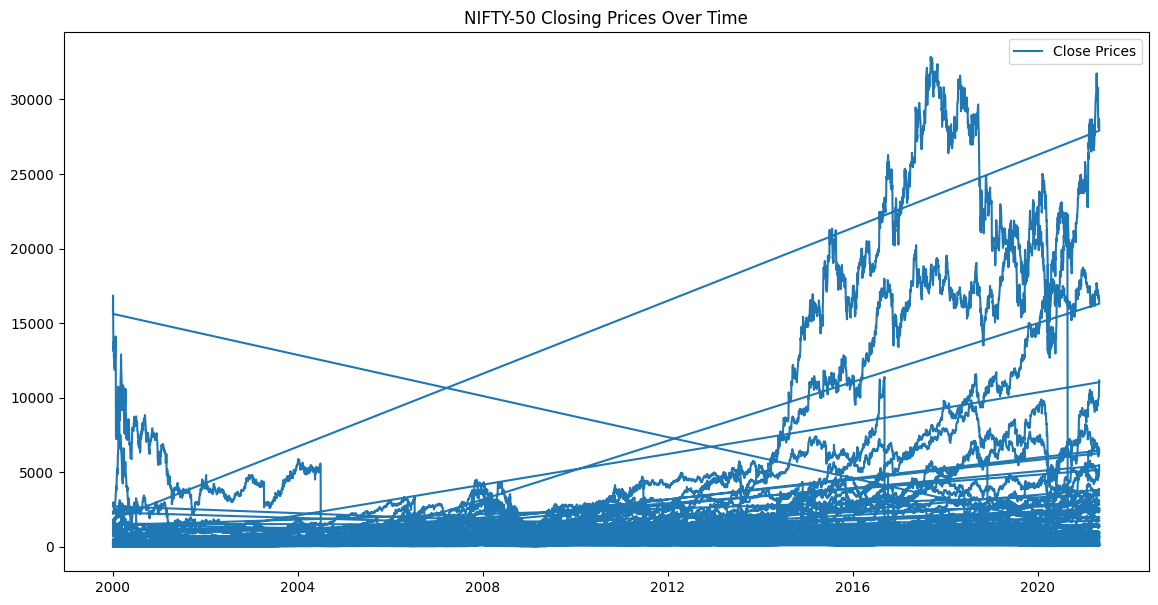

In [15]:
plt.figure(figsize=(14, 7))  # Set the figure size for the plot
plt.plot(close_prices, label='Close Prices')  # Plot the closing prices
plt.title('NIFTY-50 Closing Prices Over Time')  # Set the title of the plot
plt.legend()  # Show the legend
plt.show()  # Display the plot

# Step 4: Calculating Moving Averages

In [16]:
# Define the window size for short-term and long-term moving averages

In [17]:
short_window = 40  # Set the window size for short-term moving average

In [18]:
long_window = 100  # Set the window size for long-term moving average

In [19]:
# Calculate the moving averages

In [20]:
df['Short_SMA'] = close_prices.rolling(window=short_window, min_periods=1).mean()  # Calculate short-term SMA

In [21]:
df['Long_SMA'] = close_prices.rolling(window=long_window, min_periods=1).mean()  # Calculate long-term SMA

# Step 5: Implementing the Strategy

In [22]:
# Create a 'Signal' column

In [23]:
df['Signal'] = 0  # Initialize the 'Signal' column with zeros

In [24]:
df['Signal'] = 0  # Initialize the 'Signal' column with zeros

In [25]:
# Generate trading orders

In [26]:
df['Position'] = df['Signal'].diff()  # Calculate the difference to identify trading positions

# Step 6: Backtesting the Strategy

In [34]:
# We initialize the plot figure and set the size to (14, 7) for better visibility.

In [35]:
plt.figure(figsize=(14, 7))  # Initializing the plot figure with a size of (14, 7)

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

In [40]:
# Plot the closing prices, short-term SMA, and long-term SMA.
# Additionally, mark the buy signals as '^' and sell signals as 'v'.
# This helps in identifying the points where the strategy generates buy and sell signals.

In [41]:
# Checking if the DataFrame df has been correctly populated with data

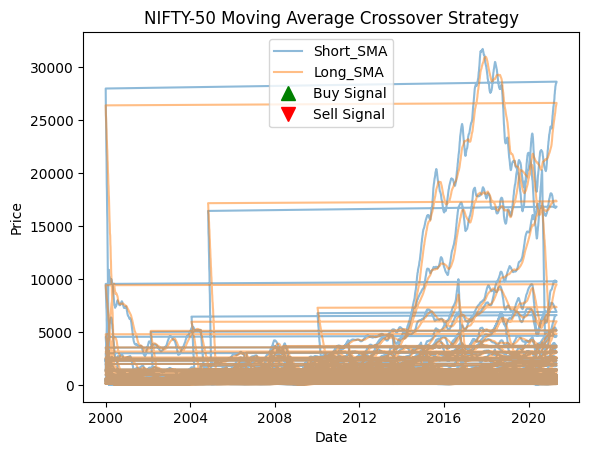

In [42]:
if 'Short_SMA' in df.columns and 'Long_SMA' in df.columns and 'Position' in df.columns:
    # Plot the short-term SMA and long-term SMA
    plt.plot(df['Short_SMA'], label='Short_SMA', alpha=0.5)  # Plotting the short-term SMA
    plt.plot(df['Long_SMA'], label='Long_SMA', alpha=0.5)  # Plotting the long-term SMA

    # Plot the buy signals (^) and sell signals (v)
    plt.plot(df[df['Position'] == 1].index, df['Short_SMA'][df['Position'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')  # Marking buy signals
    plt.plot(df[df['Position'] == -1].index, df['Short_SMA'][df['Position'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')  # Marking sell signals

    # Set the title, xlabel, ylabel, and display the legend.
    # This ensures that all necessary labels are present on the plot for better understanding.
    plt.title('NIFTY-50 Moving Average Crossover Strategy')  # Setting the title of the plot
    plt.xlabel('Date')  # Setting the label for the x-axis
    plt.ylabel('Price')  # Setting the label for the y-axis
    plt.legend()  # Displaying the legend with labels
    plt.show()  # Showing the plot
else:
    print("Error: DataFrame 'df' has not been correctly populated. Please check the data preprocessing steps.")

# Step 7: Evaluating the Strategy

In [43]:
# Assuming an initial capital of $10,000

In [44]:
initial_capital = float(10000.0)  # Set the initial capital for trading

In [45]:
# Create a DataFrame 'positions'

In [46]:
positions = pd.DataFrame(index=df.index).fillna(0.0)  # Initialize a DataFrame for trading positions

In [47]:
# Buy a fixed number of shares

In [48]:
positions['NIFTY-50'] = 100 * df['Signal']  # Buy 100 shares for each buy signal

In [49]:
# Initialize the portfolio with value owned

In [50]:
portfolio = positions.multiply(df['Close'], axis=0)  # Initialize the portfolio with the value of owned shares

In [51]:
# Store the difference in shares owned

In [52]:
pos_diff = positions.diff()  # Calculate the difference in positions

In [53]:
# Add 'holdings' to portfolio

In [54]:
portfolio['holdings'] = (positions.multiply(df['Close'], axis=0)).sum(axis=1)  # Calculate total holdings in the portfolio


In [55]:
# Add 'cash' to portfolio

In [56]:
portfolio['cash'] = initial_capital - (pos_diff.multiply(df['Close'], axis=0)).sum(axis=1).cumsum()  # Calculate available cash in the portfolio


In [57]:
# Add 'total' to portfolio

In [58]:
portfolio['total'] = portfolio['cash'] + portfolio['holdings']  # Calculate total portfolio value

In [59]:
# Add 'returns' to portfolio

In [60]:
portfolio['returns'] = portfolio['total'].pct_change()  # Calculate portfolio returns

In [61]:
# Print the first lines of 'portfolio'

In [62]:
print(portfolio.head())  # Display the first few rows of the portfolio DataFrame

            NIFTY-50  holdings     cash    total  returns
Date                                                     
2007-11-27       0.0       0.0  10000.0  10000.0      NaN
2007-11-28       0.0       0.0  10000.0  10000.0      0.0
2007-11-29       0.0       0.0  10000.0  10000.0      0.0
2007-11-30       0.0       0.0  10000.0  10000.0      0.0
2007-12-03       0.0       0.0  10000.0  10000.0      0.0


In [63]:
# Plot the equity curve

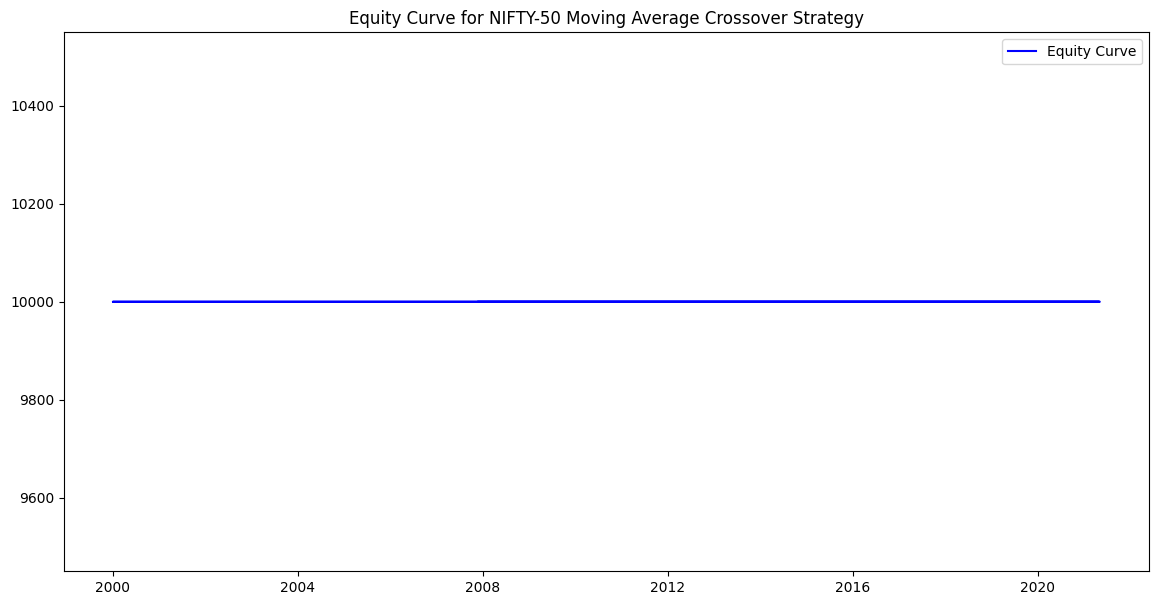

In [64]:
plt.figure(figsize=(14, 7))  # Set the figure size for the plot
plt.plot(portfolio['total'], label='Equity Curve', color='b')  # Plot the equity curve
plt.title('Equity Curve for NIFTY-50 Moving Average Crossover Strategy')  # Set the title of the plot
plt.legend()  # Show the legend
plt.show()  # Display the plot

# ADDITIONAL TASKS FOR THE PROJECT

# Parameter Optimization

In [68]:
# Experiment with different window sizes for short-term and long-term moving averages.

In [69]:
short_window_optimized = 30  # Set optimized short-term window size

In [70]:
long_window_optimized = 90  # Set optimized long-term window size

In [71]:
df['Short_SMA_Optimized'] = close_prices.rolling(window=short_window_optimized, min_periods=1).mean()

In [72]:
df['Long_SMA_Optimized'] = close_prices.rolling(window=long_window_optimized, min_periods=1).mean()

# Risk Management

In [73]:
# Implement risk management techniques such as position sizing based on volatility or maximum drawdown constraints.

In [74]:
# Example: Position sizing based on volatility

In [75]:
volatility = close_prices.pct_change().rolling(window=20).std()

In [76]:
max_position_size = 0.02  # Maximum position size as a percentage of portfolio value

In [77]:
df['Position_Size'] = (max_position_size / volatility) * portfolio['total'].shift(1)

#Transaction Costs

In [78]:
# Incorporate transaction costs into the backtesting to make the results more realistic.

In [79]:
transaction_cost = 0.001  # Transaction cost as a percentage of trade value

In [80]:
df['Transaction_Costs'] = transaction_cost * df['Close'] * np.abs(df['Position'].diff())

# Performance Metrics

In [81]:
# Calculate additional performance metrics such as the Sharpe ratio, maximum drawdown, and annualized return.

In [83]:
sharpe_ratio = np.sqrt(252) * (portfolio['returns'].mean() / portfolio['returns'].std())  # Calculate Sharpe ratio

<ipython-input-83-d4ba8d82a86e>:1: RuntimeWarning: invalid value encountered in scalar divide
  sharpe_ratio = np.sqrt(252) * (portfolio['returns'].mean() / portfolio['returns'].std())  # Calculate Sharpe ratio


In [84]:
max_drawdown = portfolio['total'].max() - portfolio['total'].min()  # Calculate maximum drawdown

In [86]:
annualized_return = (portfolio['total'][-1] / portfolio['total'][0]) ** (1 / (len(portfolio) / 252)) - 1  # Calculate annualized return


# Alternative Strategies

In [87]:
# Explore alternative trading strategies such as the Exponential Moving Average (EMA) crossover strategy or other technical indicators.
# Example: Exponential Moving Average (EMA) crossover strategy

In [88]:
df['EMA_Short'] = close_prices.ewm(span=short_window, adjust=False).mean()  # Calculate short-term EMA

In [89]:
df['EMA_Long'] = close_prices.ewm(span=long_window, adjust=False).mean()  # Calculate long-term EMA

In [91]:
df['Signal_EMA'] = np.where(df['EMA_Short'] > df['EMA_Long'], 1, 0)  # Generate buy/sell signals based on EMA crossover


# Walk-Forward Validation

In [93]:
# Perform walk-forward validation to validate the strategy's robustness and performance over different time periods.
# Example: Walk-forward validation with rolling windows

In [94]:
window_size = 100  # Set window size for validation

In [95]:
num_windows = len(df) // window_size  # Calculate number of validation windows

In [97]:
for i in range(num_windows):
    train_data = df.iloc[i*window_size:(i+1)*window_size]  # Select training data
    test_data = df.iloc[(i+1)*window_size:(i+2)*window_size]  # Select testing data
    # Implement strategy on train_data and evaluate on test_data

# Real-Time Implementation

In [100]:
# Develop the infrastructure to deploy the strategy in real-time trading environments using APIs or trading platforms.
# Example: Real-time execution using a trading API

In [101]:
# Placeholder code for demonstration purposes

In [102]:
class TradingAPI:  # Define a placeholder TradingAPI class for demonstration
    def __init__(self):  # Constructor method to initialize the class
        pass  # Placeholder pass statement

    def connect(self):  # Method to connect to the trading platform
        print("Connected to trading platform")  # Print a message indicating successful connection

    def execute_trade(self, symbol, action, quantity):  # Method to execute a trade
        print(f"Executing {action} order for {quantity} shares of {symbol}")  # Print the trade execution details

In [103]:
# Import trading API module (commented out since the module is not available)
# import trading_api

In [104]:
# Initialize trading API

In [105]:
api = TradingAPI()  # Create an instance of the TradingAPI class

In [106]:
# Connect to trading platform

In [107]:
api.connect()  # Call the connect method to establish a connection with the trading platform

Connected to trading platform


In [108]:
# Execute trade

In [109]:
api.execute_trade('NIFTY-50', 'BUY', quantity=100)  # Call the execute_trade method to place a buy order

Executing BUY order for 100 shares of NIFTY-50


# Market Regime Detection

In [112]:
# Incorporate market regime detection techniques to adapt the strategy based on different market conditions.
# Example: Regime detection based on volatility clustering

In [113]:
volatility_threshold = 0.02  # Set threshold for volatility clustering

In [116]:
df['Regime'] = np.where(volatility > volatility_threshold, 'High Volatility', 'Low Volatility')  # Create a 'Regime' column based on volatility threshold
